## Task Division

Razin Rayan Rahat (20101001) - Data Preprocessing & SVC 

Shahriar Ahmed (20101588) - Decision Tree, Random Forest Classifier & Result Analysis  

Fardin Bin Rahman (20101592) - Naive Bayes, Linear Regression & Ridge Regression

Ilmy Islam (20201214) - Data Preprocessing & kNN


## Importing Libraries


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
from google.colab import drive 

## Input reading from File

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Dataset

In [3]:
data = pd.read_csv('/content/drive/MyDrive/CSE422-Dataset/FashionDataset.csv')
data.head()

,Unnamed: 0,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women


## Data Describing

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30758 entries, 0 to 30757
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30758 non-null  int64 
 1   BrandName   30758 non-null  object
 2   Deatils     30758 non-null  object
 3   Sizes       30758 non-null  object
 4   MRP         30758 non-null  object
 5   SellPrice   30758 non-null  object
 6   Discount    30758 non-null  object
 7   Category    30758 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.9+ MB


## Data Cleaning and Handling 

In [6]:
data.columns

Index(['Unnamed: 0', 'BrandName', 'Deatils', 'Sizes', 'MRP', 'SellPrice',
       'Discount', 'Category'],
      dtype='object')

In [7]:
data.drop(columns = ["Unnamed: 0"], inplace = True)

In [8]:
data.columns

Index(['BrandName', 'Deatils', 'Sizes', 'MRP', 'SellPrice', 'Discount',
       'Category'],
      dtype='object')

In [9]:
data.head()

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women


In [10]:
data.shape

(30758, 7)

In [11]:
data.isnull().sum()

BrandName    0
Deatils      0
Sizes        0
MRP          0
SellPrice    0
Discount     0
Category     0
dtype: int64

In [12]:
data.nunique()

BrandName      275
Deatils      23877
Sizes         1172
MRP           1097
SellPrice     2046
Discount        66
Category         7
dtype: int64

In [13]:
data.replace("Nan", np.nan, inplace = True)

In [14]:
data['Sizes'] = data['Sizes'].str.replace('Size:', '')
data['Category'] = data['Category'].str.replace('-Women', '')
data['MRP'] = data['MRP'].str.replace('Rs\n', '')
data['Discount'] = data['Discount'].str.replace('% off', '')

In [15]:
data.dropna(axis=0,inplace=True)

In [16]:
data['MRP'] = data['MRP'].astype(int)
data['Discount'] = data['Discount'].astype(int)
data['SellPrice'] = data['SellPrice'].astype(int)

In [17]:
data.shape

(18374, 7)

In [18]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18374 entries, 0 to 28418
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   BrandName  18374 non-null  object
 1   Deatils    18374 non-null  object
 2   Sizes      18374 non-null  object
 3   MRP        18374 non-null  int64 
 4   SellPrice  18374 non-null  int64 
 5   Discount   18374 non-null  int64 
 6   Category   18374 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.1+ MB


,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,life,solid cotton blend collar neck womens a-line d...,"Large,Medium,Small,X-Large,X-Small",1699,849,50,Westernwear
1,only,polyester peter pan collar womens blouson dres...,"34,36,38,40",3499,2449,30,Westernwear
2,fratini,solid polyester blend wide neck womens regular...,"Large,X-Large,XX-Large",1199,599,50,Westernwear
3,zink london,stripes polyester sweetheart neck womens dress...,"Large,Medium,Small,X-Large",2299,1379,40,Westernwear
4,life,regular fit regular length denim womens jeans ...,"26,28,30,32,34,36",1699,849,50,Westernwear


In [19]:
count = data['BrandName'].value_counts()
data['BrandCount'] = data['BrandName'].apply(lambda i: count[i])
data.head()

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category,BrandCount
0,life,solid cotton blend collar neck womens a-line d...,"Large,Medium,Small,X-Large,X-Small",1699,849,50,Westernwear,554
1,only,polyester peter pan collar womens blouson dres...,"34,36,38,40",3499,2449,30,Westernwear,376
2,fratini,solid polyester blend wide neck womens regular...,"Large,X-Large,XX-Large",1199,599,50,Westernwear,204
3,zink london,stripes polyester sweetheart neck womens dress...,"Large,Medium,Small,X-Large",2299,1379,40,Westernwear,917
4,life,regular fit regular length denim womens jeans ...,"26,28,30,32,34,36",1699,849,50,Westernwear,554


In [20]:
data.describe(include=object).T

,count,unique,top,freq
BrandName,18374,105,zink london,917
Deatils,18374,15456,synthetic womens casual sandals - black,36
Sizes,18374,936,"Large,Medium,Small,X-Large,X-Small",1754
Category,18374,5,Westernwear,8221


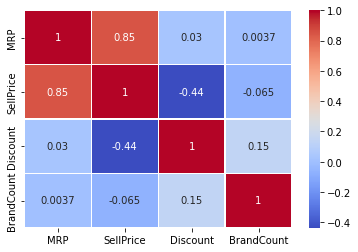

In [21]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',linewidths=0.2)

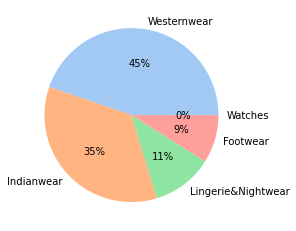

In [22]:
max = data['Category'].value_counts()
labels = data['Category'].value_counts().index
colors = sns.color_palette('pastel')[0:5]
plt.pie(max, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6fdbbd790>,
      dtype=object)

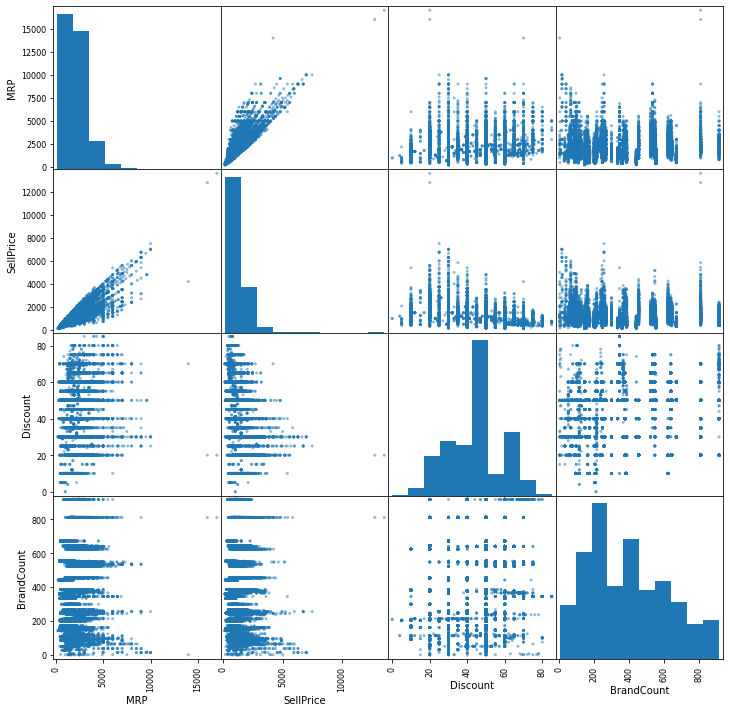

In [23]:
from pandas.plotting import scatter_matrix

scatter_matrix(data, figsize = (12, 12), alpha = 0.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


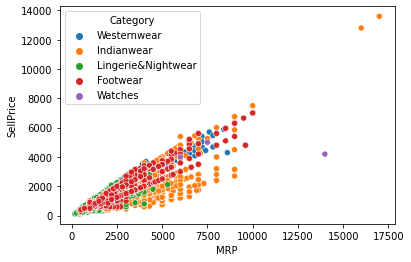

In [24]:
sns.scatterplot(data['MRP'], data['SellPrice'], hue = data['Category'])

In [25]:
data['MRP'].describe()

count    18374.000000
mean      2136.928704
std       1189.416850
min        171.000000
25%       1299.000000
50%       1899.000000
75%       2663.000000
max      16999.000000
Name: MRP, dtype: float64

In [26]:
data['SellPrice'].describe()

count    18374.000000
mean      1163.798846
std        744.201506
min        114.000000
25%        659.000000
50%        995.000000
75%       1469.000000
max      13599.000000
Name: SellPrice, dtype: float64

In [27]:
data['BrandCount'].describe()

count    18374.000000
mean       396.483945
std        236.173793
min          1.000000
25%        211.000000
50%        375.000000
75%        554.000000
max        917.000000
Name: BrandCount, dtype: float64

In [28]:
data['Discount'].describe()

count    18374.000000
mean        45.283335
std         14.203666
min          0.000000
25%         35.000000
50%         50.000000
75%         50.000000
max         85.000000
Name: Discount, dtype: float64

## Data Pre-processing

In [29]:
data.drop(columns = ["Deatils", "Sizes", "Category"], inplace = True)

In [30]:
columns_titles = ["BrandName", "MRP", "Discount", "SellPrice", "BrandCount"]
data['MRP'] = data['MRP'].astype(str)
data['Discount'] = data['Discount'].astype(str)
data['SellPrice'] = data['SellPrice'].astype(str)
data = data.reindex(columns = columns_titles)

In [31]:
data

,BrandName,MRP,Discount,SellPrice,BrandCount
0,life,1699,50,849,554
1,only,3499,30,2449,376
2,fratini,1199,50,599,204
3,zink london,2299,40,1379,917
4,life,1699,50,849,554
...,...,...,...,...,...
26673,lemon & pepper,2999,50,1499,162
26674,haute curry,2199,50,1099,386
26885,swiss eagle,13990,70,4197,1
27290,lawman watches,7499,33,4999,2


## Scikit-Learn Library 

In [32]:
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## Decision Tree Classifier

In [33]:
X = data.iloc[:, 1:3]
y = data.iloc[:, 3:4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
result = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
result.fit(X_train, y_train)
y_pred = result.predict(X_test)
scoreDT = accuracy_score(y_pred, y_test)
print(scoreDT)

0.9504761904761905


In [34]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_pred, y_test)
print(mat)

[[  1   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   1 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   2   0]
 [  0   0   0 ...   0   0 106]]


In [35]:
from sklearn.metrics import recall_score

scr_d = recall_score(y_pred, y_test, average = 'micro')
print(scr_d)

0.9504761904761905


In [36]:
from sklearn.metrics import precision_score

scr_d1 = precision_score(y_pred, y_test, average = 'micro')
print(scr_d1)

0.9504761904761905


In [37]:
from sklearn.metrics import f1_score

scr_d2 = f1_score(y_pred, y_test, average = 'micro')
print(scr_d2)

0.9504761904761905


## SVC - Support Vector Classifier 



In [38]:
from sklearn.svm import SVC

svc = SVC(gamma = "auto")
svc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma='auto')

In [39]:
print("Training Score:", svc.score(X_train, y_train))
print("Test Score:", svc.score(X_test, y_test))

Training Score: 0.9919042111708279
Test Score: 0.9461224489795919


In [40]:
pred2 = svc.predict(X_test)
scoreSVC = accuracy_score(pred2, y_test)
print(scoreSVC)

0.9461224489795919


In [41]:
from sklearn.metrics import confusion_matrix

mat1 = confusion_matrix(pred2, y_test)
print(mat1)

[[  1   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   1 ...   0   0   0]
 ...
 [  0   0   0 ...   5   0   0]
 [  0   0   0 ...   0   2   0]
 [  0   0   0 ...   0   0 106]]


In [42]:
scr_s = recall_score(pred2, y_test, average = 'micro')
print(scr_s)

0.9461224489795919


In [43]:
scr_s1 = precision_score(pred2, y_test, average = 'micro')
print(scr_s1)

0.9461224489795919


In [44]:
scr_s2 = f1_score(pred2, y_test, average = 'micro')
print(scr_s2)

0.9461224489795919


## Random Forest Classication

In [45]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(n_estimators=200)

In [46]:
print("Training Score: ", rfc.score(X_train, y_train))
print("Test Score: ", rfc.score(X_test, y_test))

Training Score:  0.9969385672494727
Test Score:  0.9510204081632653


In [47]:
pred3 = rfc.predict(X_test)
scoreRFC = accuracy_score(pred3, y_test)
print(scoreRFC)

0.9510204081632653


In [48]:
mat2 = confusion_matrix(pred3, y_test)
print(mat2)

[[  1   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   1 ...   0   0   0]
 ...
 [  0   0   0 ...   5   0   0]
 [  0   0   0 ...   0   2   0]
 [  0   0   0 ...   0   0 106]]


In [49]:
scr_rfc = recall_score(pred3, y_test, average = 'micro')
print(scr_rfc)

0.9510204081632653


In [50]:
scr_rfc1 = precision_score(pred3, y_test, average = 'micro')
print(scr_rfc1)

0.9510204081632653


In [51]:
scr_rfc2 = f1_score(pred3, y_test, average = 'micro')
print(scr_rfc2)

0.9510204081632653


## Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression

rg = LinearRegression()
rg.fit(X_train, y_train)

LinearRegression()

In [53]:
print("Training Score: ", rg.score(X_train, y_train))
print("Test Score: ", rg.score(X_test, y_test))

Training Score:  0.9377005880202302
Test Score:  0.9406432866843732


In [54]:
print(rg.coef_)
print(rg.intercept_)

[[  0.54179793 -24.14413913]]
[1098.65846193]


In [55]:
from sklearn.metrics import r2_score

pred4 = rg.predict(X_test)
scoreLR = r2_score(pred4, y_test)
print(scoreLR)

0.9368643446500489


## Ridge Regression

In [56]:
from sklearn.linear_model import Ridge

top = Ridge()
top.fit(X_train, y_train)

Ridge()

In [57]:
print("Training Score: ", top.score(X_train, y_train))
print("Test Score: ", top.score(X_test, y_test))

Training Score:  0.9377005880202063
Test Score:  0.9406432841458373


In [58]:
print(top.coef_)
print(top.intercept_)

[[  0.54179792 -24.14413103]]
[1098.65810236]


In [59]:
pred5 = top.predict(X_test)
scoreRR = r2_score(pred5, y_test)
print(scoreRR)

0.9368643320432554


## Naive Bayes 

In [60]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [61]:
print("Training Score: ", gnb.score(X_train, y_train))
print("Test Score: ", gnb.score(X_test, y_test))

Training Score:  0.3933600925233009
Test Score:  0.37768707482993197


In [62]:
gnbP = gnb.predict(X_test)
scoreNB = accuracy_score(gnbP, y_test)
print(scoreNB)

0.37768707482993197


In [63]:
mat5 = confusion_matrix(gnbP, y_test)
print(mat5)

[[ 1  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  1 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  2  0]
 [ 0  1  0 ...  0  0 27]]


In [64]:
scr_nb = recall_score(gnbP, y_test, average = 'micro')
print(scr_nb)

0.37768707482993197


In [65]:
scr_nb1 = precision_score(gnbP, y_test, average = 'micro')
print(scr_nb1)

0.37768707482993197


In [66]:
scr_nb2 = f1_score(gnbP, y_test, average = 'micro')
print(scr_nb2)

0.37768707482993197


## kNN Classifier 

In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [68]:
print("Training Score: ", knn.score(X_train, y_train))
print("Test Score: ", knn.score(X_test, y_test))

Training Score:  0.9263215184706443
Test Score:  0.9047619047619048


In [69]:
knnP = knn.predict(X_test)
scoreKNN = accuracy_score(knnP, y_test)
print(scoreKNN)

0.9047619047619048


In [70]:
mat6 = confusion_matrix(knnP, y_test)
print(mat6)

[[  0   1   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   5   0   0]
 [  0   0   0 ...   0   2   0]
 [  0   0   0 ...   0   0 106]]


In [71]:
scr_knn = recall_score(knnP, y_test, average = 'micro')
print(scr_knn)

0.9047619047619048


In [72]:
scr_knn1 = precision_score(knnP, y_test, average = 'micro')
print(scr_knn1)

0.9047619047619048


In [73]:
scr_knn2 = f1_score(knnP, y_test, average = 'micro')
print(scr_knn2)

0.9047619047619048


## Result Analysis  

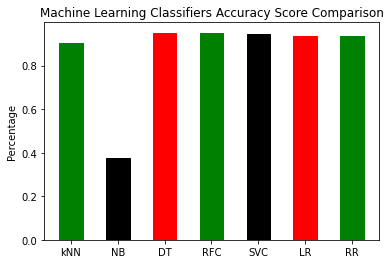

In [74]:
algorithms = ['kNN', 'NB', 'DT', 'RFC', 'SVC', 'LR', 'RR']

accuracy = [scoreKNN, scoreNB, scoreDT, scoreRFC, scoreSVC, scoreLR, scoreRR]

bars = plt.bar(algorithms, accuracy, width = 0.5)
bars[0].set_color('green')
bars[1].set_color('black')
bars[2].set_color('red')
bars[3].set_color('green')
bars[4].set_color('black')
bars[5].set_color('red')
bars[6].set_color('green')

plt.ylabel("Percentage")
plt.title("Machine Learning Classifiers Accuracy Score Comparison")
plt.show()

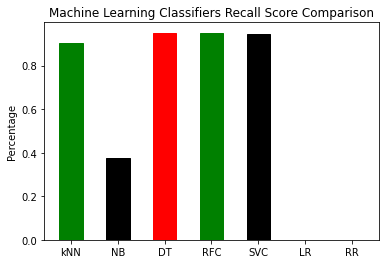

In [75]:
algorithms1 = ['kNN', 'NB', 'DT', 'RFC', 'SVC', 'LR', 'RR']

recall = [scr_knn, scr_nb, scr_d, scr_rfc, scr_s, 0, 0]

bars1 = plt.bar(algorithms1, recall, width = 0.5)
bars1[0].set_color('green')
bars1[1].set_color('black')
bars1[2].set_color('red')
bars1[3].set_color('green')
bars1[4].set_color('black')
bars1[5].set_color('red')
bars1[6].set_color('green')

plt.ylabel("Percentage")
plt.title("Machine Learning Classifiers Recall Score Comparison")
plt.show()

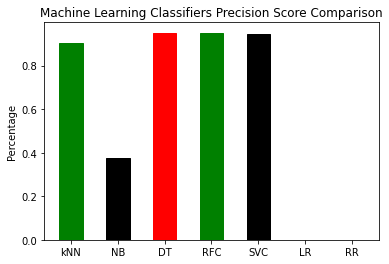

In [76]:
algorithms2 = ['kNN', 'NB', 'DT', 'RFC', 'SVC', 'LR', 'RR']

precision = [scr_knn1, scr_nb1, scr_d1, scr_rfc1, scr_s1, 0, 0]

bars2 = plt.bar(algorithms2, precision, width = 0.5)
bars2[0].set_color('green')
bars2[1].set_color('black')
bars2[2].set_color('red')
bars2[3].set_color('green')
bars2[4].set_color('black')
bars2[5].set_color('red')
bars2[6].set_color('green')

plt.ylabel("Percentage")
plt.title("Machine Learning Classifiers Precision Score Comparison")
plt.show()

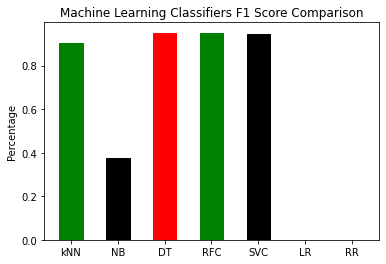

In [77]:
algorithms3 = ['kNN', 'NB', 'DT', 'RFC', 'SVC', 'LR', 'RR']

f1 = [scr_knn2, scr_nb2, scr_d2, scr_rfc2, scr_s2, 0, 0]

bars3 = plt.bar(algorithms3, f1, width = 0.5)
bars3[0].set_color('green')
bars3[1].set_color('black')
bars3[2].set_color('red')
bars3[3].set_color('green')
bars3[4].set_color('black')
bars3[5].set_color('red')
bars3[6].set_color('green')

plt.ylabel("Percentage")
plt.title("Machine Learning Classifiers F1 Score Comparison")
plt.show()